In [25]:
import numpy as np

In [26]:
import matplotlib.pyplot as plt

In [27]:
import pandas as pd

In [28]:
unrate = pd.read_csv('unrate.csv')  # Open csv file.
unrate['DATE'] = pd.to_datetime(unrate['DATE'])  # Convert 'DATE' into datetime.
print(unrate.head(12))  # Views the first 12 rows. Will later iterate through each year.

         DATE  VALUE
0  1948-01-01    3.4
1  1948-02-01    3.8
2  1948-03-01    4.0
3  1948-04-01    3.9
4  1948-05-01    3.5
5  1948-06-01    3.6
6  1948-07-01    3.6
7  1948-08-01    3.9
8  1948-09-01    3.8
9  1948-10-01    3.7
10 1948-11-01    3.8
11 1948-12-01    4.0


In [29]:
%matplotlib inline  # Need to run this magic every time this opens to display graphs.

UsageError: unrecognized arguments: # Need to run this magic every time this opens to display graphs.


[]

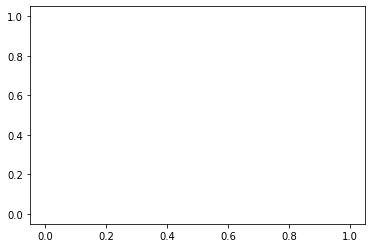

In [30]:
plt.plot()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


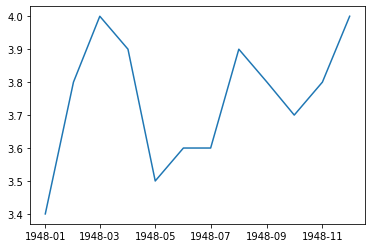

In [31]:
first_twelve = unrate[0:12]  # This gives us the first year.
plt.plot(first_twelve['DATE'], first_twelve['VALUE'])  # Each plot represents the row, column
plt.show()

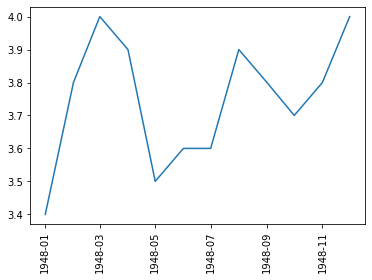

In [32]:
plt.plot(first_twelve['DATE'], first_twelve['VALUE'])
plt.xticks(rotation=90)  # Rotates x tickers for readability.
plt.show()

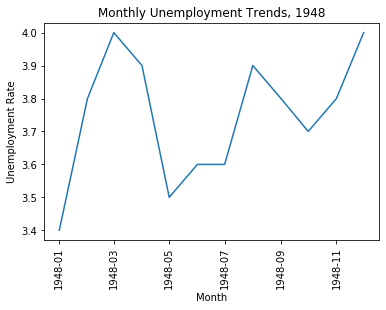

In [33]:
plt.plot(first_twelve['DATE'], first_twelve['VALUE'])
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.title('Monthly Unemployment Trends, 1948')
plt.show()

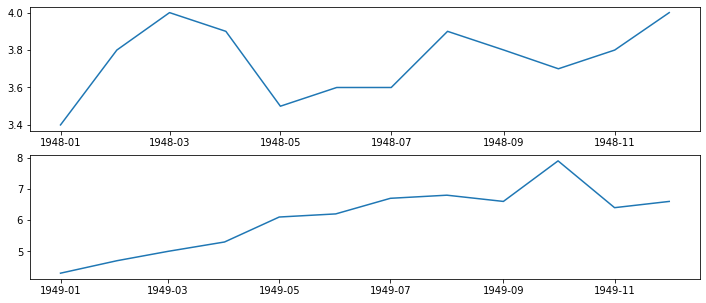

In [37]:
fig = plt.figure(figsize=(12, 5))  # This parameter takes in a tuple of floats.
                                   # Matplotlib used the default dimensions for the total 
                                   # plotting area instead of resizing it to accommodate the plots.

ax1 = fig.add_subplot(2,1,1)  # Params designate row, column, number of plots.
ax2 = fig.add_subplot(2,1,2)

ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])  # First year of data, 1948
ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])  # Second year of data, 1949

plt.show()

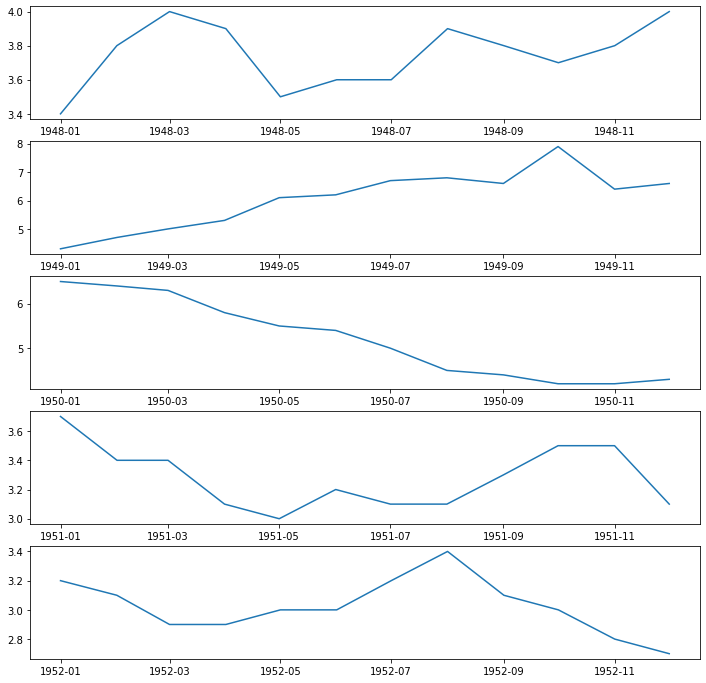

In [39]:
fig = plt.figure(figsize=(12,12))

'''
Each year spans 12 rows in the unrate DataFrame. You can access the data from 1949 using unrate.iloc[12:24], 
the data from 1950 using unrate.iloc[24:36], the data from 1951 using unrate.iloc[36:48], and so on.
'''

for i in range(5):
    ax = fig.add_subplot(5,1,i+1)
    start_index = (i*12)
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    ax.plot(subset['DATE'], subset['VALUE'])

plt.show()

The problem we run through here is that this plotting becomes visually difficult if mapping more data, like decade(s). We can handle the visual overhead each additional plot adds by overlaying the line charts in a single subplot. If we remove the year from the x-axis and just keep the month values, we can use the same x-axis values to plot all of the lines.

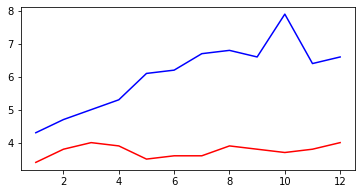

In [41]:
unrate['MONTH'] = unrate['DATE'].dt.month  # Since we converted to datetime earlier, we can extract each month now.
'''
To extract the month values from the DATE column and assign them to a new column, 
we can use the pandas.Series.dt accessor.
Calling pandas.Series.dt.month returns a Series containing the integer values for each month 
(e.g. 1 for January, 2 for February, etc.).
'''

fig = plt.figure(figsize=(6,3))

plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red')
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue')

plt.show()

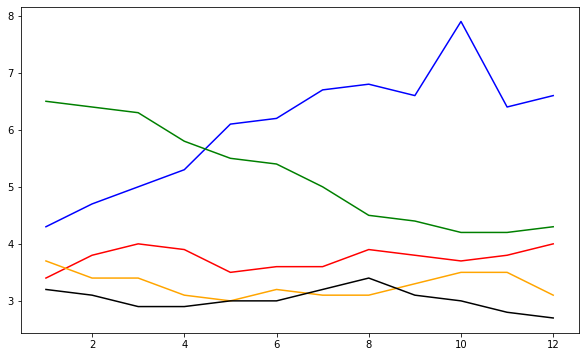

In [42]:
unrate['MONTH'] = unrate['DATE'].dt.month
fig = plt.figure(figsize=(10,6))

plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red')
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue')
plt.plot(unrate[24:36]['MONTH'], unrate[24:36]['VALUE'], c='green')
plt.plot(unrate[36:48]['MONTH'], unrate[36:48]['VALUE'], c='orange')
plt.plot(unrate[48:60]['MONTH'], unrate[48:60]['VALUE'], c='black')

plt.show()


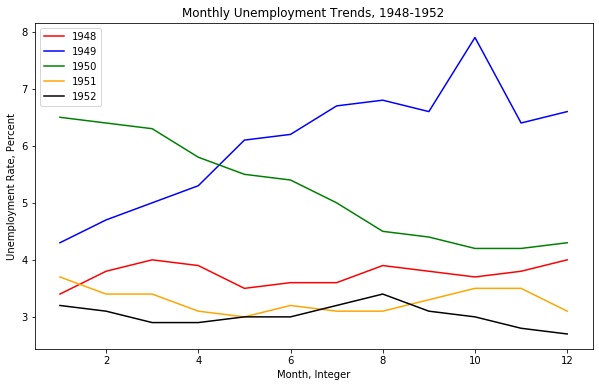

In [49]:
fig = plt.figure(figsize=(10,6))

for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    colors = ['red', 'blue', 'green', 'orange', 'black']
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)
plt.legend(loc=2)  # There are location codes/words. Check documentation.

plt.xlabel('Month, Integer')  # Adding labels.
plt.ylabel('Unemployment Rate, Percent')
plt.title('Monthly Unemployment Trends, 1948-1952')

plt.show()